# Reto: Análisis de datos para tweets durante la pandemia
### Equipo 1:
* Alejandro Mariacca Santin
* Jorge Rodrigo Colín Rubio
* Pablo Ricardo Durán Sánchez
* Karen Paula Mayorga Guerrero
* José Antonio Pacheco Chargoy 
* Andrés Tavera Mihailide 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

data = pd.read_csv("covid19_tweets.csv")
data.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
# Encontrar columnas del dataframe
df = data[['user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified','date','text', 'hashtags', 'source', 'is_retweet']] 
print(df)

                     user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Br

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_followers,179108.0,109055.528184,841467.000703,0.0,172.0,992.0,5284.00,49442559.0
user_friends,179108.0,2121.701566,9162.553072,0.0,148.0,542.0,1725.25,497363.0
user_favourites,179108.0,14444.105663,44522.698958,0.0,206.0,1791.0,9388.00,2047197.0


## Alejandro Mariacca Santin


### Encontrar características entre usuarios con más de 100,000 seguidores a partir de los tweets que escriben

### A01654102

### Objetivo

Este análisis se centrará en la búsqueda e identificación de características similares entre los tweets de los usuarios con más de 100 mil seguidores durante la época de la pandemia por Covid-19. 

Visto con las métricas para metas smart, se puuede visualizar de la siguiente forma:
* **S**pecific: Encontrar  las palabras en común que twittean las personas con más de 100 mil seguidores y además, encontrar el promedio de seguidores que tienen las personas que twittean sobre el covid.
* **M**easurable: Se medirá de acuerdo con la frecuencia que aparezcan las palabras.
* **A**chievable: La meta es alcanzable porque se disponen de los conocimientos y herramientas para llevarla a cabo.
* **R**elevant: Es relevante, porque a partir de ello se puede dividir la información en grupos y obtener insights que de otra forma no eran visibles.
* **T**ime bound: Esta meta debe cumplirse para antes del 24 de marzo de 2023 a las 11 am con tiempo de la Ciudad de México.

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import re
import nltk.corpus
# Descomentar si no está instalado
# nltk.download(‘stopwords’)
from nltk.corpus import stopwords
# Mi python anda loco y no quiere instalar wordcloud :(
#from wordcloud import WordCloud

# Cargar datos
data = pd.read_csv("covid19_tweets.csv")
# Obtener una breve visualización de los datos
data.head(5)


FileNotFoundError: ignored

### Primer paso: Importar librerías y archivo csv

La base de datos con la que trabajaremos muestra los distintos tweets que se hicieron en el año 2019, durante la pandemia, y muestran algunos datos del usuario.

##Andrés Tavera
##Objetivo
Se busca saber las carecteristicas en común que tienen los usuarios con más de 500,000 seguidores durante la pandemia

In [ ]:
#Para eso debemos de filtrar la base de datos y trabajar solo con los que presenten más de 500,000 seguidores
df_nfamosos=df_famosos= df[df["user_followers"]<500000]
df_famosos= df[df["user_followers"]>500000]
df_famosos

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
25,Blood Donors India,"Mumbai, India",Focused on matching blood donors with those in...,2008-12-23 07:55:39,1215920,2047,19359,True,2020-07-25 12:26:26,#Kolar\nNeed #Blood Type : B-positive\nAt : J...,"['Kolar', 'Blood', 'COVID19']",Blood Donors India,False
77,IMF,"Washington, DC",Breaking news and alerts from the Internationa...,2009-03-18 16:13:51,1695520,444,182,True,2020-07-25 12:25:02,What economic measures are governments taking ...,['COVID19'],Hootsuite Inc.,False
78,Oxfam International,NaN,Oxfam is a world-wide development organization...,2007-12-31 18:27:35,843670,1172,23652,True,2020-07-25 12:25:00,“#Covid19 is everyone’s fight. I have covered ...,['Covid19'],Twitter Web App,False
87,New Straits Times,Malaysia,"News, views and up-to-date reports from Malays...",2009-07-09 09:04:01,716342,411,874,True,2020-07-25 12:24:38,#NSTworld There will not be a #NationalDayRall...,"['NSTworld', 'NationalDayRally', 'NDR']",TweetDeck,False
120,Livemint,India,Breaking news and analyses of Indian and world...,2008-11-27 09:07:38,1902888,117,472,True,2020-07-25 12:23:44,"Bihar witnesses biggest single-day spike of 2,...",['Covid19'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178823,Cognizant,"Global (HQ: Teaneck, N.J.)",Cognizant (Nasdaq: CTSH) is dedicated to helpi...,2009-08-28 20:31:48,761451,2932,3543,True,2020-08-29 20:00:15,The remote work force has grown 44% — our 4-po...,['COVID19'],Khoros Marketing,False
178845,AMA,Chicago/Washington D.C.,American Medical Association: Physicians' powe...,2009-03-31 17:50:31,734929,6915,3209,True,2020-08-29 20:00:00,.@JournalofEthics speaks with members of an Am...,NaN,Sprinklr,False
178921,China Xinhua News,"Headquartered in Beijing, PRC",We are public media for the public good. We do...,2012-02-09 01:10:18,12656340,64,0,True,2020-08-29 19:55:19,"China, France to uphold multilateralism to pro...",['COVID19'],China Xinhua News,False
179001,"People's Daily, China","Beijing, China",The largest newspaper in China,2011-05-23 15:00:26,7095451,4554,1060,True,2020-08-29 19:50:00,#HongKong streets restore hustle and bustle as...,"['HongKong', 'COVID19', 'epidemic']",TweetDeck,False


In [ ]:
df_famosos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_followers,5196.0,3.379612e+06,3.651779e+06,500070.0,761451.00,1878954.0,5007492.0,49442559.0
user_friends,5196.0,3.190647e+03,2.822635e+04,0.0,126.00,335.0,1070.0,497363.0
user_favourites,5196.0,4.185503e+03,1.070050e+04,0.0,143.75,874.0,2960.5,145938.0


Después de filtrar la base de datos, debemos de hacernos ciertas preguntas. Las que se responderan son las siguientes

* ¿Cuántos tweets hace en promedio una persona famosa?
* ¿Están verificados?
* ¿Qué relación existe entre los seguidores y a los likes que dan?


In [ ]:
tweets_per_username = df_famosos.groupby("user_name")
ntweets_per_username = df_nfamosos.groupby("user_name")

#Promedio de tweets por persona
df_famososbxplt=tweets_per_username["text"].count()

df_nfamososbxplt=ntweets_per_username["text"].count()

df_famososbxplt.mean()




14.761363636363637

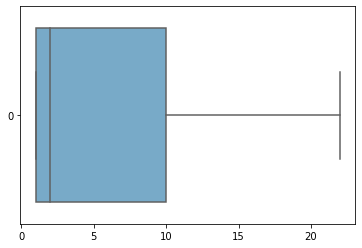

In [ ]:
sns.boxplot(data=df_famososbxplt, orient="h", palette='Blues', showfliers=False)
plt.show()

In [ ]:
df_famososbxplt.median()


2.0

In [ ]:
print(df_famososbxplt.max())
print(df_famososbxplt.min())

In [ ]:
print(df_nfamososbxplt.median())
print(df_nfamososbxplt.max())
print(df_nfamososbxplt.min())
print(df_nfamososbxplt.mean())


1.0
679
1
1.891725495741464


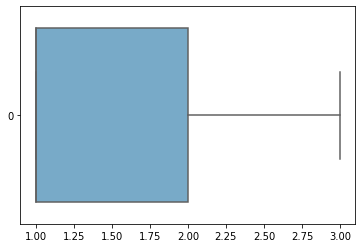

In [ ]:
sns.boxplot(data=df_nfamososbxplt, orient="h", palette='Blues', showfliers=False)
plt.show()

Aquí podemos apreciar como los usarios no famosos varian, hay la mediana es de un tweet y su maxima alcanza los 679 twwets. Aquí podemos encontrar tanto gente muy activa como muy poco activa. Aún así la media por usuario es de 1 tweet, es decir, son muy poco activos en su mayoría

In [ ]:
df_famosos.groupby("user_verified").count()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,text,hashtags,source,is_retweet
user_verified,,,,,,,,,,,,
False,59,55,59,59,59,59,59,59,59,53,59,59
True,5137,4813,5135,5137,5137,5137,5137,5137,5137,4229,5137,5137


Podemos ver que en efecto estos usuarios, en su mayoría tienen la verificación. Esto se sospechaba desde un inicio, pero con lo que descubrimos previamente sobre la cantidad de tweets, teníamos que invesitgar.

In [ ]:
df_nfamosos.groupby("user_verified").count()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,text,hashtags,source,is_retweet
user_verified,,,,,,,,,,,,
False,155954,121091,145679,155954,155954,155954,155954,155954,155954,110229,155877,155954
True,17958,16378,17949,17958,17958,17958,17958,17958,17958,13263,17958,17958


En cuanto a los no famosos, podemos observar que en su mayoría no estpan verificados. Caolo 18,000 de los casi 170,000 tweets fuero hechos por alguien verificado.

In [ ]:

print(df_famosos.iloc[:,[4,5]].corr())



                user_followers  user_friends
user_followers        1.000000     -0.068686
user_friends         -0.068686      1.000000


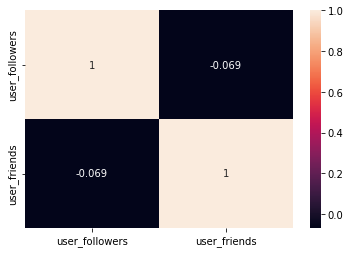

In [ ]:
sns.heatmap(df_famosos.iloc[:,[4,5]].corr(), annot=True)
plt.show()

Podemos ver que no hay ninguna similitud entre estos dos. Es decir no hay nada que parezca indicar que uno afecta a la otra.

Hasta el momento no hemos visto nada que concluya que características tiene alguien famoso.

In [ ]:
print(df_nfamosos.iloc[:,[4,5]].corr())

                user_followers  user_friends
user_followers        1.000000      0.228873
user_friends          0.228873      1.000000


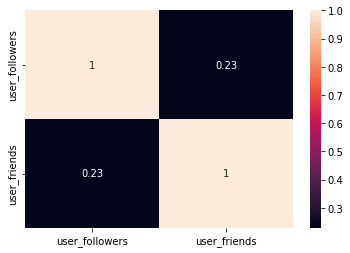

In [ ]:
sns.heatmap(df_nfamosos.iloc[:,[4,5]].corr(), annot=True)
plt.show()

Este si parece tener un poco más de correlación, es decir que en este rango si afecta un poco más la actividad que tengas en la aplicación. 

##Conclusión
Pudimos observar que en su mayoría, los famosos son un poco más activos en twitter en cuanto a publicaciones. Nos dimos cuenta, que en esta epoca de Covid, la mejor oprtunidad, que tampoco garantiza el exito, es ser activo en cuanto a likes. Entre más activo seas, más probabildad tienes de ser exitoso, pero al ya ser famoso, los likes que des no te garantizan más exito.

# **Karen Paula Mayorga Guerrero**

Objetivo: Determinar el impacto en variables user followers, user friends y user favorites en inicios y finales de las bases de datos para lo usuarios de twitter por medio de diferentes análisis a través de la primera base y última base de datos del año 2020 gracias a las herramientas proporcionadas por la materia esta semana se logrará llevar a cabo el análisis.Y, lo anterior se logrará trabajando en un lapso de 8 horas el día 23 de marzo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#inicio de la documentacion de tweets
data1 = pd.read_csv("covid19_tweets_inicio.csv",index_col = 'date')
data1.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,is_retweet
date,,,,,,,,,,,,
2020-07-25 12:27:21,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
2020-07-25 12:27:17,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2020-07-25 12:27:14,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
2020-07-25 12:27:10,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
2020-07-25 12:27:08,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
#final de la documentacion de tweets
data2 = pd.read_csv("covid19_tweets_final.csv",index_col = 'date')
data2.head(5)

In [ ]:
#Se crea una data en base a la dara inicial y la data final
superData=pd.merge(data1,data2,left_on="user_name", right_on="user_name")
superData.head(5)


In [ ]:
#Gráfica para comparar en las bases de datos las variables user_followers, user_friends y 	user_favourites

Datos1=data1.iloc[:,[4,8]]
print(Datos1.plot())

Datos2=data2.iloc[:,[4,8]]
print(Datos2.plot())

In [ ]:
Datos3=data1.iloc[:,[5,8]]
print(Datos3.plot())
Datos4=data2.iloc[:,[5,8]]
print(Datos4.plot())

In [ ]:
Datos5=data1.iloc[:,[6,8]]
print(Datos5.plot())
Datos6=data2.iloc[:,[6,8]]
print(Datos6.plot())

In [ ]:
#Análisis comparativo  para las 3 variables 


print(data1['user_followers'].describe())
print("\n")
print(data2['user_followers'].describe())
print("\n")


print(data1['user_friends'].describe())
print("\n")
print(data2['user_friends'].describe())
print("\n")


print(data1['user_favourites'].describe())
print("\n")
print(data2['user_favourites'].describe())
print("\n")

In [ ]:
Datos11=superData.iloc[:,[4,15]]
print(Datos11.corr())
print("\n")

Datos12=superData.iloc[:,[4,16]]
print(Datos12.corr())
print("\n")

Datos13=superData.iloc[:,[4,17]]
print(Datos13.corr())
print("\n")


In [ ]:
sns.heatmap(superData.iloc[:,[4,15]].corr(), annot=True)
plt.show()

In [ ]:
sns.heatmap(superData.iloc[:,[4,16]].corr(), annot=True)
plt.show()

In [ ]:
sns.heatmap(superData.iloc[:,[4,17]].corr(), annot=True)
plt.show()

##José Antonio Pacheco

Objetivo: Determinar la evolución de los temas de interÃ©s en Twitter (mediante hashtags de los tweets de los usuarios) a lo largo del tiempo durante la pandemia de Covid-19.